In [1]:
from PIL import Image, ImageOps
import glob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

def img_to_array(filename):    
    """Takes an image file, resizes to 512 by width or height
    (whichever larger) and convert to array"""    
    img = Image.open(filename)    
    desired_size = 512    
    old_size = img.size    
    ratio = float(desired_size)/max(old_size)
    
    # preserving image aspect ratio    
    new_size = tuple([int(x*ratio)for x in old_size])    
    img = img.resize(new_size,Image.ANTIALIAS)

    # converting to array
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    img_wide = img.reshape(1,-1)
    return img_wide[0]

def plot_img_from_arr(arr):
    """Reconstruct image from 1D array"""
    img = Image.new('RGB',(512,384))
    a1 = np.empty((196608,), dtype=object)
    a1[:]=[tuple([int(j) for j in i]) for i in arr.reshape(196608, 3)]
    img.putdata(a1)
    return np.asarray(img)

# Accessing 20 photos for the LBA into an array
photos = glob.glob('LBA/*.jpg')
raw_data = [img_to_array(photo) for photo in photos]

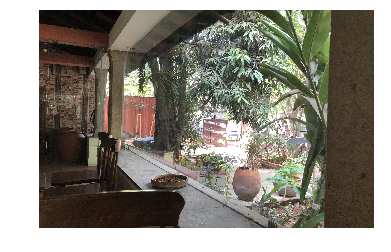

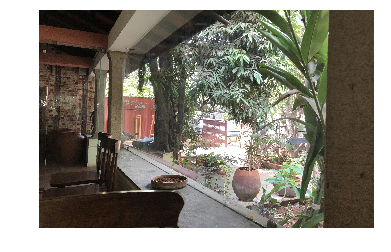

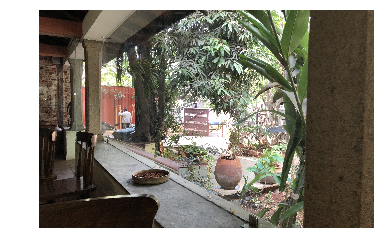

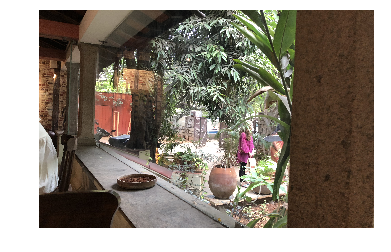

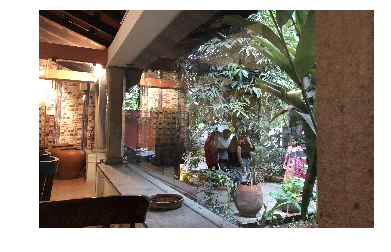

In [2]:
# Show 5 original images
for i in range(5):
    pil_im = Image.open(photos[i*4], 'r')
    plt.imshow(np.asarray(pil_im),aspect='auto')
    plt.axis('off')
    plt.show()

In [3]:
# Fitting PCA with 2 components
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(raw_data)
pca_inverse = pca.inverse_transform(pca_data)

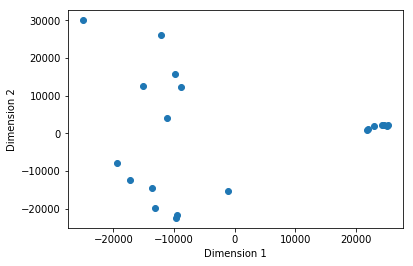

In [4]:
# Visualize 2-D data as a scatterplot
plt.scatter(*zip(*pca_data))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

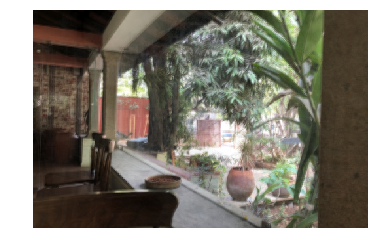

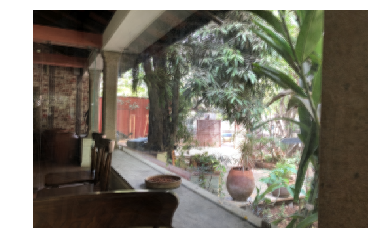

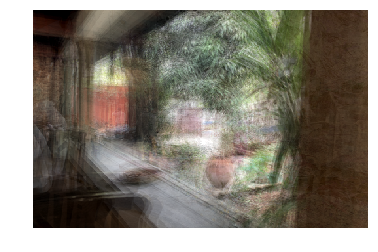

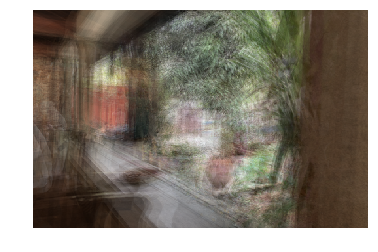

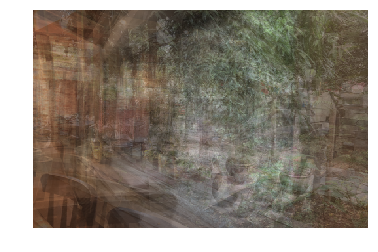

In [5]:
# Show 5 transformed images
for image in range(5):
    plt.imshow((np.asarray(plot_img_from_arr(pca_inverse[image*4]))),aspect='auto')
    plt.axis('off')
    plt.show()

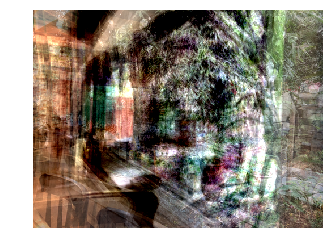

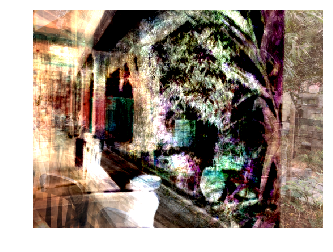

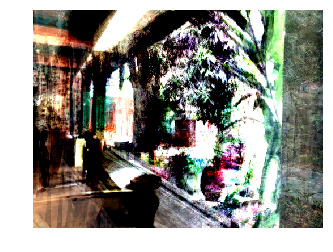

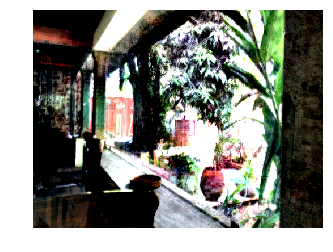

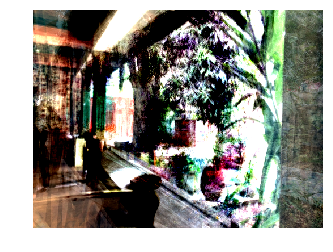

In [6]:
from random import randint

random_points = [] # list of random points

# Generate 5 sets of random PCA data and show the image
for i in range(5):
    random_x = randint(-100000,100000)
    random_y = randint(-100000,100000)

    random_point = (random_x, random_y)
    random_points.append(random_point)

    random_inverse = pca.inverse_transform(random_point)

    plt.imshow((np.asarray(plot_img_from_arr(random_inverse))))
    plt.axis('off')
    plt.show()

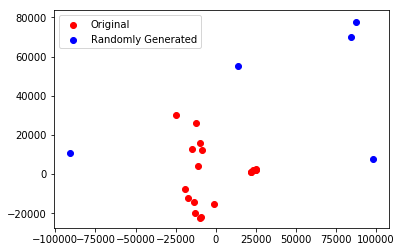

In [7]:
# Plot original image data and randomly generated data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zip(*pca_data),color='r',label='Original')
ax1.scatter(*zip(*random_points),color='b',label='Randomly Generated')
plt.legend(loc='best')
plt.show()